In [117]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('cardhekoProject.csv')

In [5]:
data.head()

Fuel_type  Body_type  Kilometers_driven Transmission_type  \
0    Petrol  Hatchback             120000            Manual   
1    Petrol        SUV              32706            Manual   
2    Petrol  Hatchback              11949            Manual   
3    Petrol      Sedan              17794            Manual   
4    Diesel        SUV              60000            Manual   

   Number_of_previous_owners Original_Equipment_Manufacturer  \
0                          3                          Maruti   
1                          2                            Ford   
2                          1                            Tata   
3                          1                         Hyundai   
4                          1                          Maruti   

            Car_model  Year_of_manufacture  Central_variant_ID  \
0      Maruti Celerio                 2015                3979   
1       Ford Ecosport                 2018                6087   
2          Tata Tiago                 2018                2983   
3       Hyundai Xcent                 2014                1867   
4  Maruti SX4 S Cross                 2015                4277   

               Variant_name  ...  Steering Type Turning Radius  \
0                       VXI  ...          Power     4.7 metres   
1  1.5 Petrol Titanium BSIV  ...          Power     5.3 metres   
2           1.2 Revotron XZ  ...          Power     4.9 meters   
3        1.2 Kappa S Option  ...          Power     4.7 metres   
4             DDiS 200 Zeta  ...          Power     5.2 meters   

  Front Brake Type Rear Brake Type         Tyre Type No Door Numbers  \
0  Ventilated Disc            Drum  Tubeless, Radial             5.0   
1  Ventilated Disc            Drum   Tubeless,Radial             4.0   
2             Disc            Drum          Tubeless             5.0   
3            Disc             Drum   Tubeless,Radial             4.0   
4  Ventilated Disc      Solid Disc   Tubeless,Radial             5.0   

  Cargo Volumn Top Speed   Acceleration       City  
0   235-litres  150 Kmph  15.05 Seconds  Bangalore  
1   352-litres       NaN            NaN  Bangalore  
2   242-litres  150 kmph   14.3 Seconds  Bangalore  
3   407-litres  172km/hr   14.2 Seconds  Bangalore  
4   353-litres  190 Kmph     12 Seconds  Bangalore  

[5 rows x 54 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Fuel_type                        8368 non-null   object 
 1   Body_type                        8368 non-null   object 
 2   Kilometers_driven                8368 non-null   int64  
 3   Transmission_type                8368 non-null   object 
 4   Number_of_previous_owners        8368 non-null   int64  
 5   Original_Equipment_Manufacturer  8368 non-null   object 
 6   Car_model                        8368 non-null   object 
 7   Year_of_manufacture              8368 non-null   int64  
 8   Central_variant_ID               8368 non-null   int64  
 9   Variant_name                     8368 non-null   object 
 10  Price_of_the_used_car            8368 non-null   int64  
 11  Registration Year                8368 non-null   object 
 12  Insurance Validity  

In [9]:
for col in data.columns:
    print('Unique values of ' + col)
    print(data[col].unique())
    print("---------------------------------------------------------")

Unique values of Fuel_type
['Petrol' 'Diesel' 'Lpg' 'Cng' 'Electric']
---------------------------------------------------------
Unique values of Body_type
['Hatchback' 'SUV' 'Sedan' 'MUV' 'Coupe' 'Minivans' 'Pickup Trucks'
 'Convertibles' 'Hybrids' 'Wagon']
---------------------------------------------------------
Unique values of Kilometers_driven
[120000  32706  11949 ...  53562  32190 151000]
---------------------------------------------------------
Unique values of Transmission_type
['Manual' 'Automatic']
---------------------------------------------------------
Unique values of Number_of_previous_owners
[3 2 1 4 5 0]
---------------------------------------------------------
Unique values of Original_Equipment_Manufacturer
['Maruti' 'Ford' 'Tata' 'Hyundai' 'Jeep' 'Datsun' 'Honda' 'Mahindra'
 'Mercedes-Benz' 'BMW' 'Renault' 'Audi' 'Toyota' 'Mini' 'Kia' 'Skoda'
 'Volkswagen' 'Volvo' 'MG' 'Nissan' 'Fiat' 'Mahindra Ssangyong'
 'Mitsubishi' 'Jaguar' 'Land Rover' 'Chevrolet' 'Citroen' 'O

In [11]:
round(data['Engine_Displacement'].mean())

1425

In [13]:
data['Engine_Displacement'] = data['Engine_Displacement'].fillna(round(data['Engine_Displacement'].mean()))
data['Engine_Displacement'] = data['Engine_Displacement'].astype(int)

In [15]:
data['Engine_Displacement'].value_counts()

Engine_Displacement
1197    1607
998      640
1199     489
1497     451
1248     424
        ... 
970        1
1590       1
2497       1
1299       1
2489       1
Name: count, Length: 150, dtype: int64

In [17]:
data['Engine_Displacement'].isnull().sum()

0

In [19]:
data['Engine_Category'] = pd.cut(data['Engine_Displacement'], 
                               bins=[0, 500, 900, 1100, 1200, 1300, 1400, 1500, 1600, 2000, 3000, 4000, 5001], 
                               labels=['0-500','501-900','901-1100', '1101-1200', '1201-1300', '1301-1400', '1401-1500', '1501-1600','1601-2000', '2001-3000', '3001-4000', '4001-5001'], right = False)

In [21]:
data['Engine_Category'].value_counts()

Engine_Category
1101-1200    2502
1401-1500    1393
901-1100     1214
1601-2000     814
2001-3000     745
1201-1300     457
1501-1600     412
501-900       386
1301-1400     380
3001-4000      30
0-500          27
4001-5001       8
Name: count, dtype: int64

In [23]:
data['Engine_Category'].isnull().sum()

0

In [25]:
data = data.rename(columns={'Original_Equipment_Manufacturer': 'Car_brand'})

In [27]:
data['No of Cylinder'].value_counts()

No of Cylinder
4.0    6141
3.0    2004
6.0     129
5.0      23
2.0      15
7.0      13
8.0      12
Name: count, dtype: int64

In [29]:
data['No of Cylinder'].isnull().sum()

31

In [31]:
data['No of Cylinder'].mean()

3.8001679261125103

In [33]:
data['No of Cylinder'] = data['No of Cylinder'].fillna(data['No of Cylinder'].mean())
data['No of Cylinder'] = data['No of Cylinder'].astype(int)

In [35]:
data['No of Cylinder'].isnull().sum()

0

In [37]:
data['No of Cylinder'].value_counts()

No of Cylinder
4    6141
3    2035
6     129
5      23
2      15
7      13
8      12
Name: count, dtype: int64

In [39]:
data['Price_of_the_used_car'].value_counts()

Price_of_the_used_car
650000     106
450000      98
500000      97
300000      97
400000      90
          ... 
997000       1
4290000      1
628000       1
788000       1
1082000      1
Name: count, Length: 1400, dtype: int64

In [41]:
data['Price_in_lakhs'] = data['Price_of_the_used_car'] / 100000

In [63]:
data['Wheel Base'].value_counts()

Wheel Base
2425mm      415
2600mm      412
2520mm      369
2570mm      318
2450mm      311
           ... 
3264mm        1
2,600 mm      1
2760          1
2,373 mm      1
2622mm        1
Name: count, Length: 273, dtype: int64

In [65]:
data['Wheel Base'] = data['Wheel Base'].str.replace('mm', '').str.replace('m', '').str.replace(',', '')
data['Wheel Base'] = pd.to_numeric(data['Wheel Base'])

In [67]:
data['Wheel Base'].value_counts()

Wheel Base
2450.0    626
2600.0    477
2425.0    417
2520.0    393
2380.0    370
         ... 
2373.0      1
2787.0      1
2010.0      1
2860.0      1
2622.0      1
Name: count, Length: 183, dtype: int64

In [69]:
data['Wheel Base'].isnull().sum()

163

In [71]:
round(data['Wheel Base'].mean())

2549

In [73]:
data['Wheel Base'] = data['Wheel Base'].fillna(data['Wheel Base'].mean())

In [75]:
data['Wheel Base'].isnull().sum()

0

In [77]:
data['Wheel Base'] = data['Wheel Base'].astype(int)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Fuel_type                      8368 non-null   object  
 1   Body_type                      8368 non-null   object  
 2   Kilometers_driven              8368 non-null   int64   
 3   Transmission_type              8368 non-null   object  
 4   Number_of_previous_owners      8368 non-null   int64   
 5   Car_brand                      8368 non-null   object  
 6   Car_model                      8368 non-null   object  
 7   Year_of_manufacture            8368 non-null   int64   
 8   Central_variant_ID             8368 non-null   int64   
 9   Variant_name                   8368 non-null   object  
 10  Price_of_the_used_car          8368 non-null   int64   
 11  Registration Year              8368 non-null   object  
 12  Insurance Validity             836

<Axes: xlabel='Year_of_manufacture', ylabel='Density'>

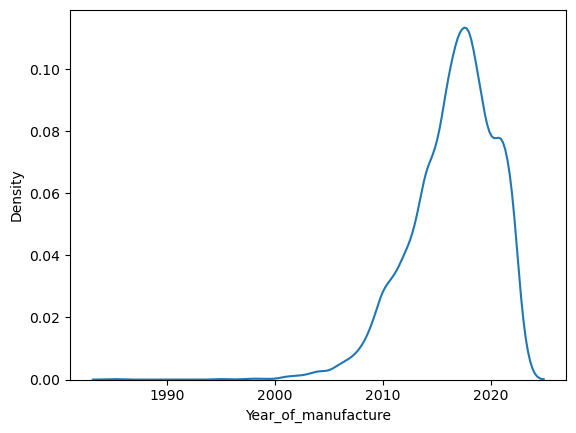

In [43]:
sns.kdeplot(data['Year_of_manufacture'])

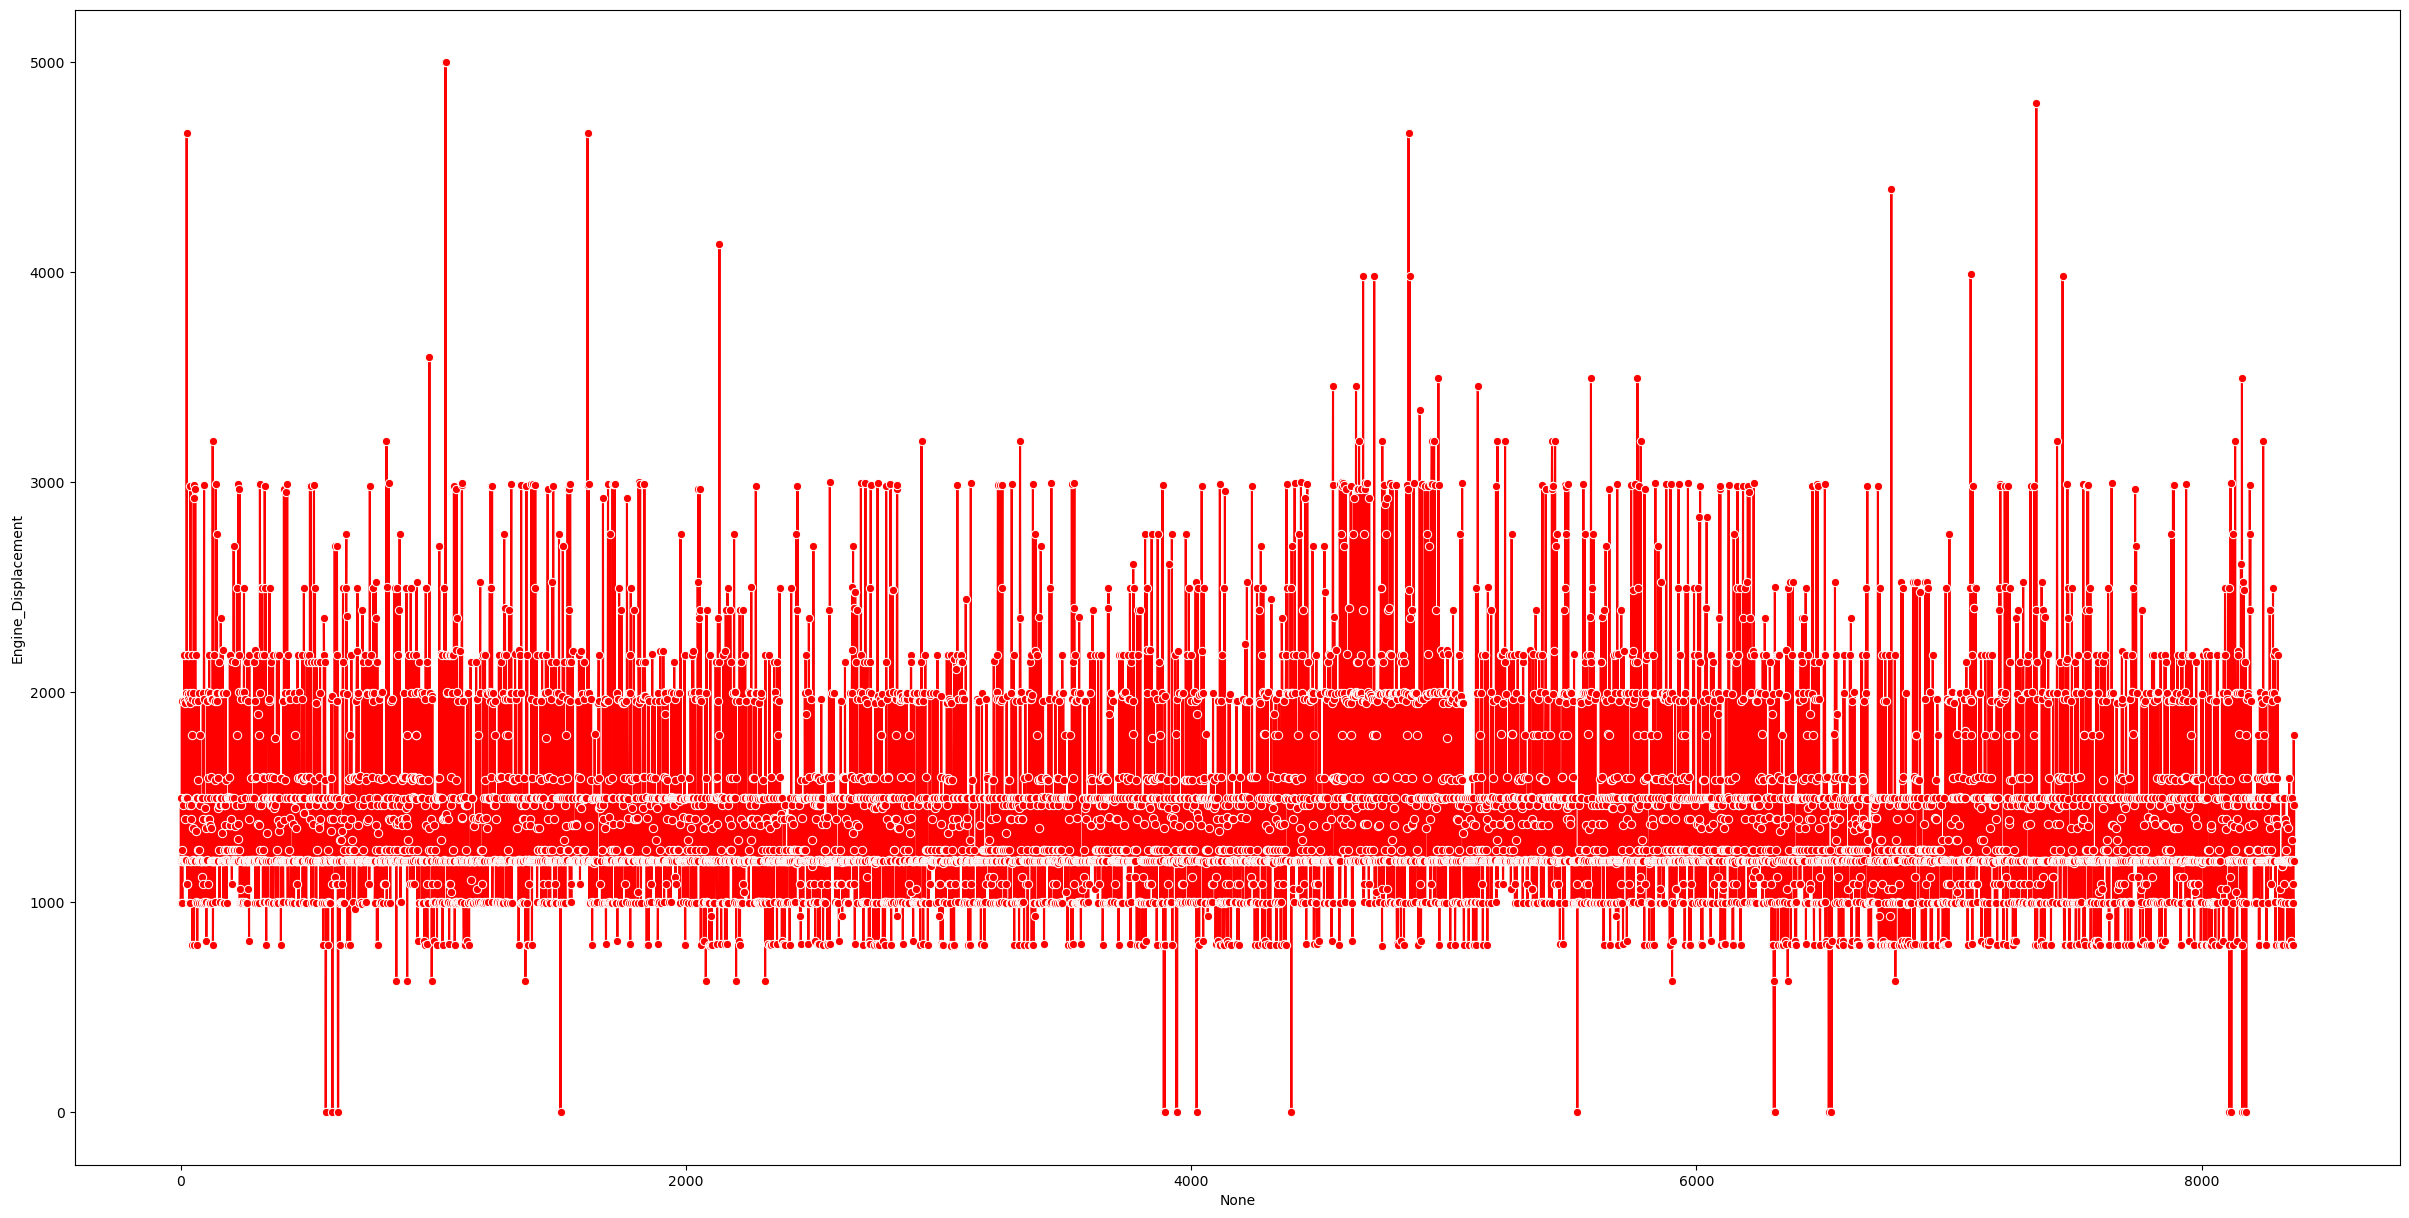

In [53]:
plt.figure(figsize = (30,15))
sns. lineplot(data = data, x = data.index, y = 'Engine_Displacement', marker = "o", color = "r")
plt.show()

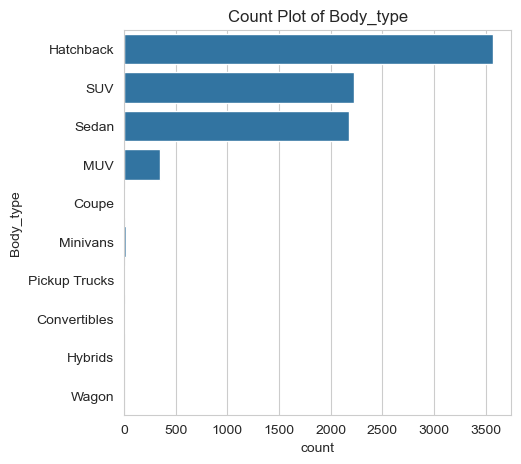

In [175]:
plt.figure(figsize = (5,5))
sns.countplot(y='Body_type', data=data)
plt.title('Count Plot of Body_type')
plt.show()

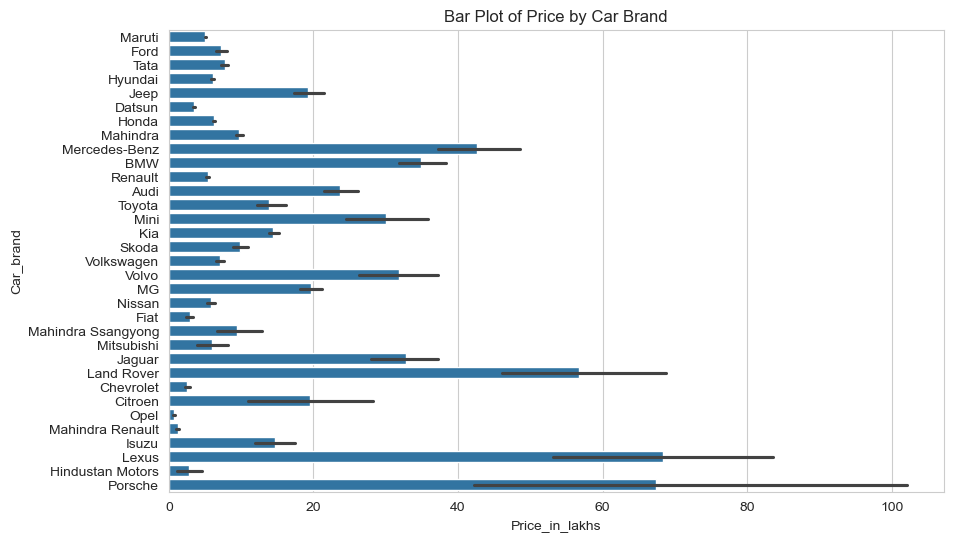

In [129]:
plt.figure(figsize = (10,6))
sns.barplot(x='Price_in_lakhs', y='Car_brand', data=data)
plt.title('Bar Plot of Price by Car Brand')
plt.show()

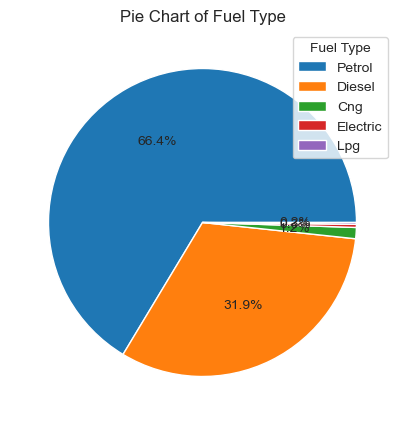

In [165]:
fuel_types = data['Fuel_type'].value_counts().index
fuel_counts = data['Fuel_type'].value_counts().values

plt.figure(figsize=(15,5))
plt.pie(fuel_counts, autopct='%1.1f%%')
plt.legend(title="Fuel Type", labels=fuel_types)
plt.title('Pie Chart of Fuel Type')
plt.show()

C:\Users\osrnm\AppData\Local\Temp\ipykernel_8152\4003794706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transmission_type', data=data, palette = 'bright' )


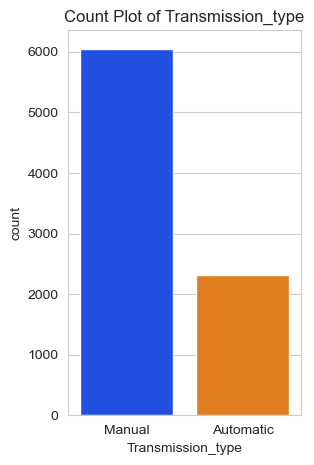

In [149]:
plt.figure(figsize = (3,5))
sns.countplot(x='Transmission_type', data=data, palette = 'bright' )
plt.title('Count Plot of Transmission_type')
plt.show()

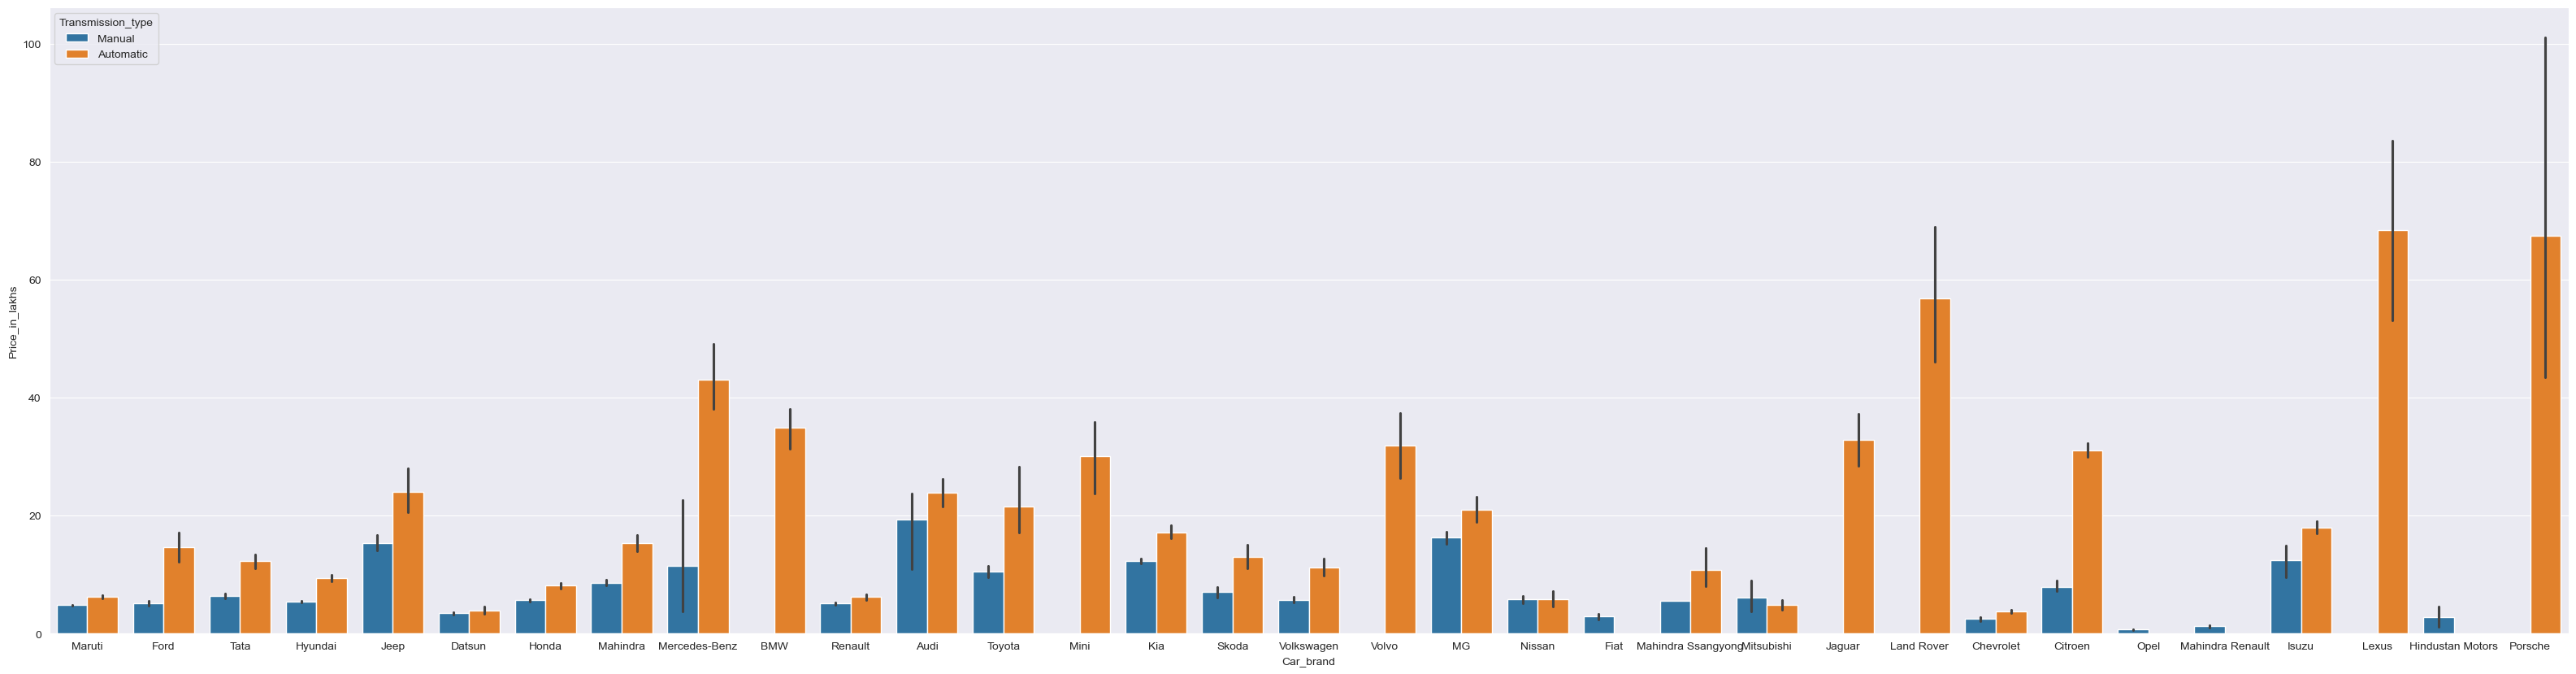

In [175]:
sns.set_style('darkgrid')

plt.figure(figsize=(40, 10))

sns.barplot(data = data, x = 'Car_brand', y = 'Price_in_lakhs', hue = 'Transmission_type' )

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

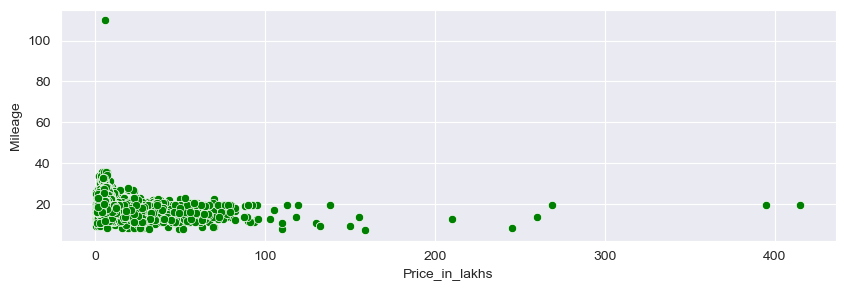

In [179]:
### Scatter plot

plt.figure(figsize=(10,3))

sns.scatterplot(data = data, x ='Price_in_lakhs' , y = 'Mileage', color = 'g')

plt.show


In [215]:
df = data.groupby('Year_of_manufacture')['Car_brand'].count().reset_index()

In [229]:
df = df.sort_values("Year_of_manufacture", ascending = False).head(25)

In [231]:
df

Year_of_manufacture  Car_brand
28                 2023        104
27                 2022        563
26                 2021        686
25                 2020        612
24                 2019        789
23                 2018        980
22                 2017        944
21                 2016        815
20                 2015        605
19                 2014        588
18                 2013        400
17                 2012        339
16                 2011        272
15                 2010        254
14                 2009        144
13                 2008         85
12                 2007         56
11                 2006         44
10                 2005         20
9                  2004         25
8                  2003         13
7                  2002         10
6                  2001          9
5                  2000          1
4                  1999          2

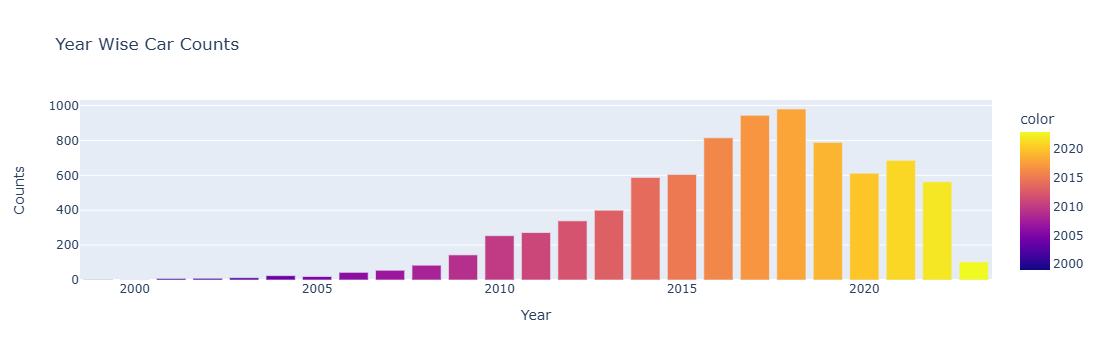

In [235]:
fig = px.bar(

    x = df['Year_of_manufacture'],
    y = df['Car_brand'],
    title= "Year Wise Car Counts",
    labels= {'x': "Year", 'y': 'Counts'},
    color = df['Year_of_manufacture']


)

fig.show()

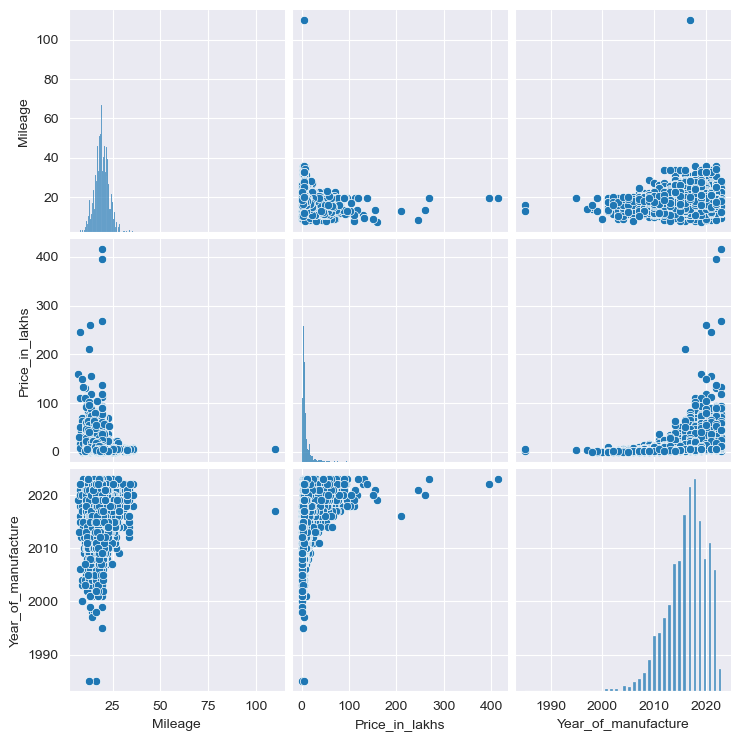

In [295]:
sns.pairplot(data[['Mileage','Price_in_lakhs', 'Year_of_manufacture']])
plt.show()

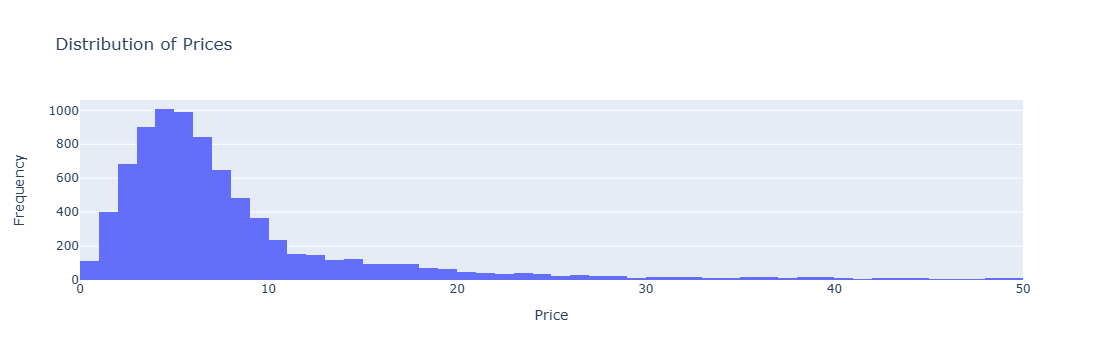

<Figure size 600x600 with 0 Axes>

In [263]:
# Plot the distribution of prices interactively
plt.figure(figsize=(6, 6))
fig = px.histogram(data, x='Price_in_lakhs', title='Distribution of Prices', range_x=[0, 50])
fig.update_layout(xaxis_title='Price', yaxis_title='Frequency')
fig.show()

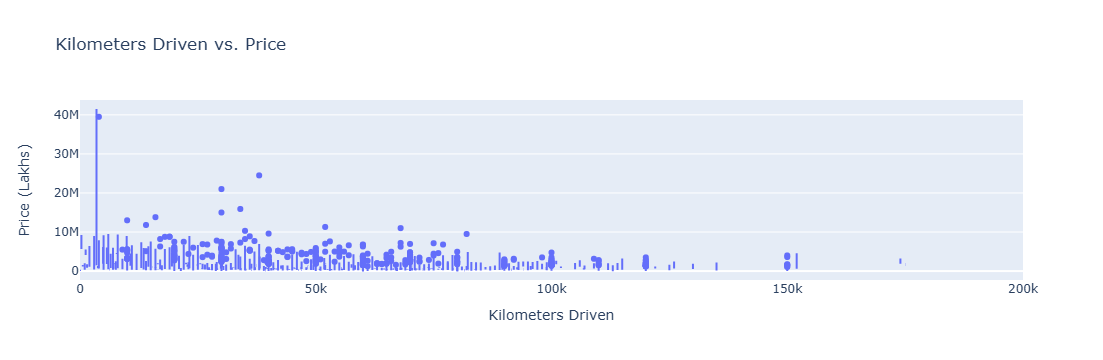

In [285]:
# Create an interactive boxplot
fig = px.box(data, x='Kilometers_driven', y='Price_of_the_used_car', title='Kilometers Driven vs. Price', range_x=[0, 200000] )
fig.update_layout(xaxis_title='Kilometers Driven', yaxis_title='Price (Lakhs)')
fig.show()

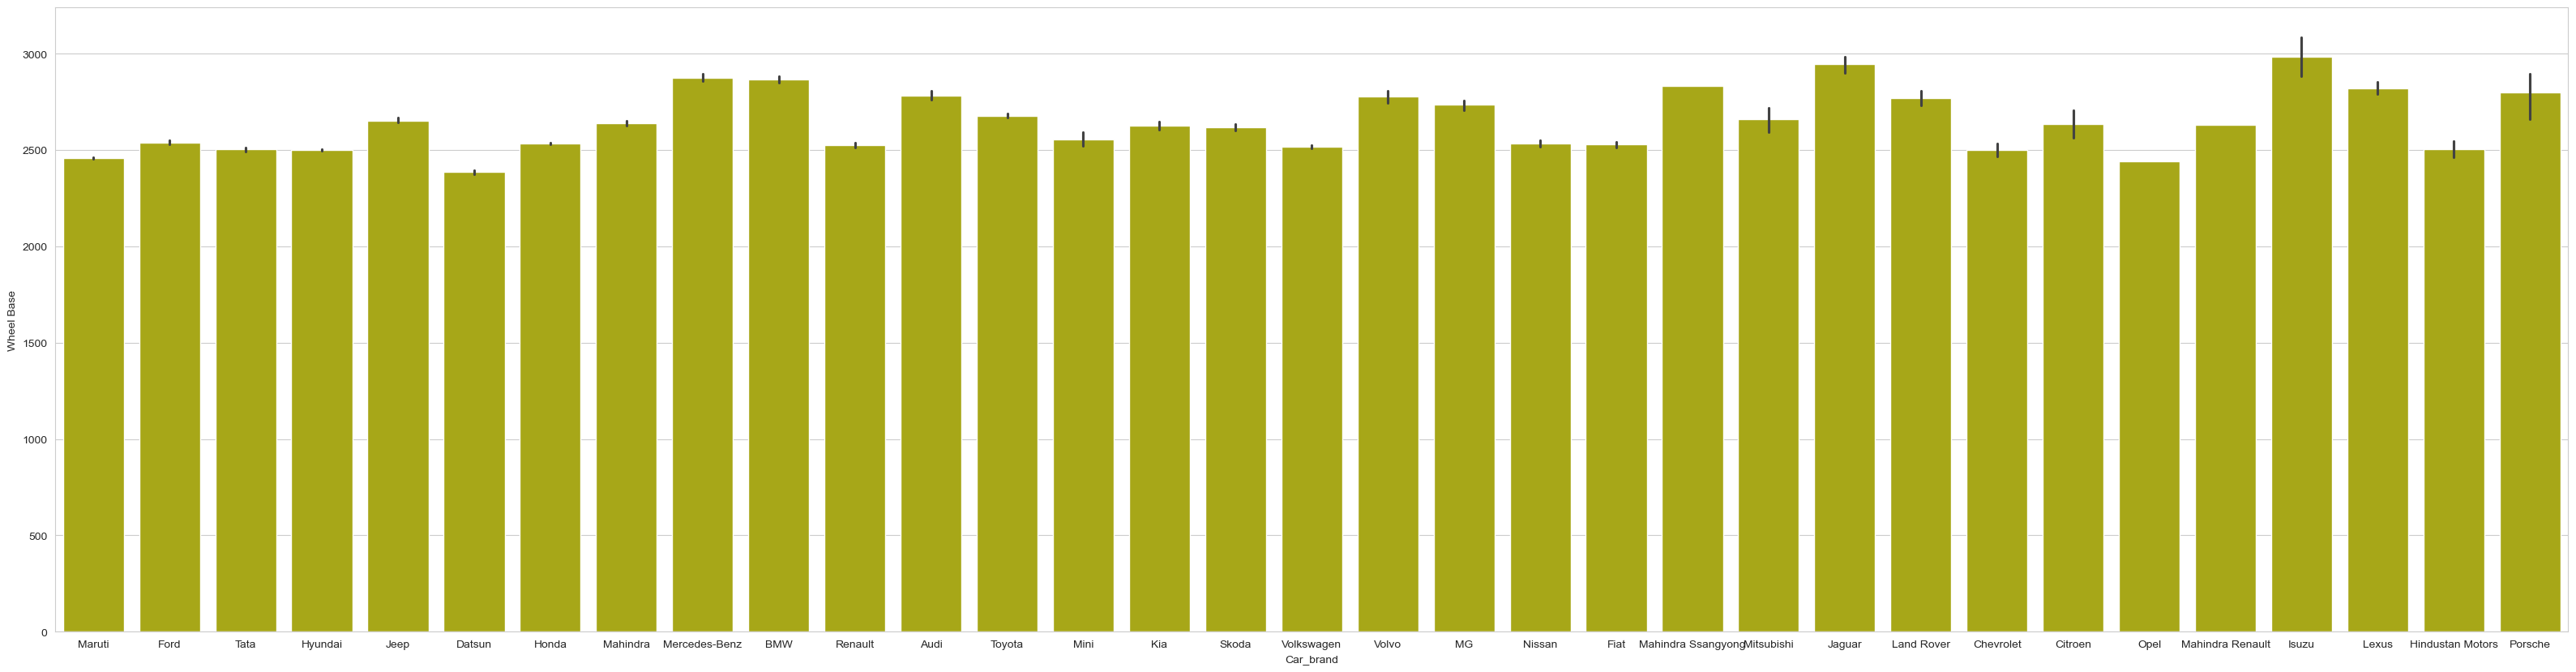

In [103]:
sns.set_style('whitegrid')

plt.figure(figsize=(40, 10))

sns.barplot(data = data, x = 'Car_brand', y = 'Wheel Base', orient= 'v',  color= 'y' )

plt.show()

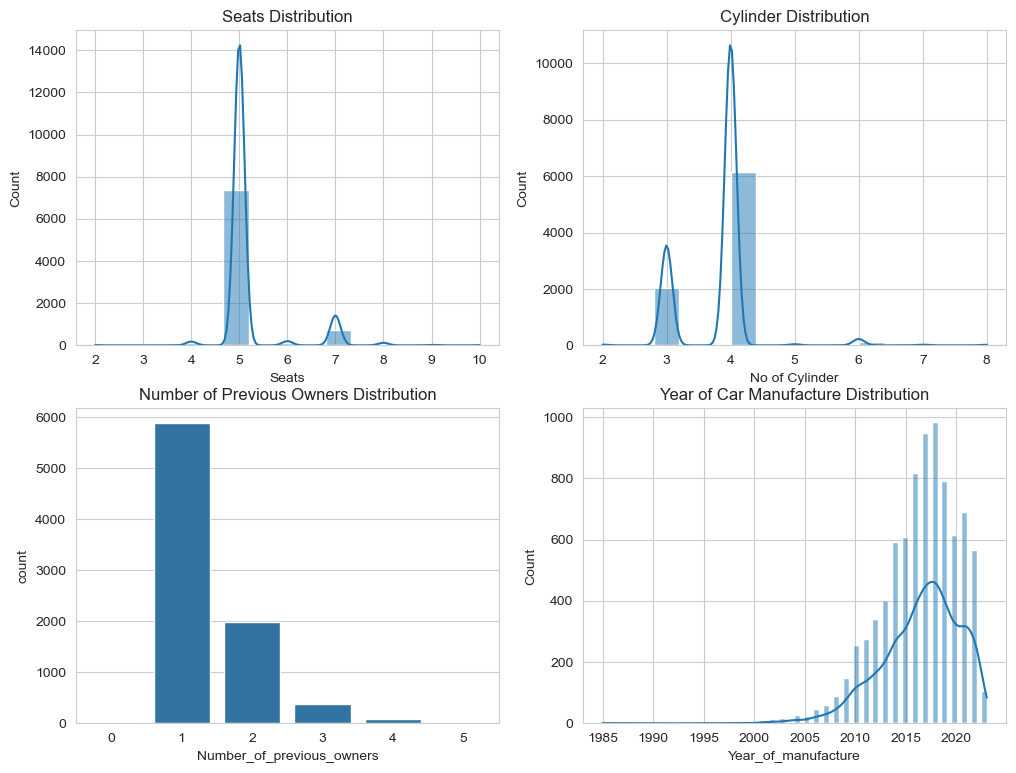

In [187]:
# Plot Price_of_the_used_car
fig, axes = plt.subplots(2,2, figsize = (12,9))
sns.histplot(data=data, x='Seats', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Seats Distribution')

sns.histplot(data=data, x='No of Cylinder', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Cylinder Distribution')

sns.countplot(data=data, x='Number_of_previous_owners', ax=axes[1, 0])
axes[1, 0].set_title('Number of Previous Owners Distribution')

sns.histplot(data=data, x='Year_of_manufacture', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Year of Car Manufacture Distribution')

plt.show()

In [253]:
data.select_dtypes(include=['int32', 'int64', 'float64'])

Kilometers_driven  Number_of_previous_owners  Year_of_manufacture  \
0                120000                          3                 2015   
1                 32706                          2                 2018   
2                 11949                          1                 2018   
3                 17794                          1                 2014   
4                 60000                          1                 2015   
...                 ...                        ...                  ...   
8363              10000                          1                 2022   
8364             120000                          1                 2014   
8365              50000                          3                 2011   
8366              40000                          1                 2012   
8367             120000                          2                 2017   

      Central_variant_ID  Price_of_the_used_car  Mileage  Seats  \
0                   3979                 400000    23.10      5   
1                   6087                 811000    17.00      5   
2                   2983                 585000    23.84      5   
3                   1867                 462000    19.10      5   
4                   4277                 790000    23.65      5   
...                  ...                    ...      ...    ...   
8363                8682                 510000    25.24      5   
8364                3943                 180000    22.74      5   
8365                4672                 550000    11.74      5   
8366                4144                 140000    18.50      5   
8367                5048                 500000    19.72      5   

      Engine_Displacement  No of Cylinder  Values per Cylinder  \
0                     998               3                  4.0   
1                    1497               3                  4.0   
2                    1199               3                  4.0   
3                    1197               4                  4.0   
4                    1248               4                  4.0   
...                   ...             ...                  ...   
8363                  998               3                  4.0   
8364                  796               3                  4.0   
8365                 1796               4                  4.0   
8366                 1197               4                  4.0   
8367                 1461               4                  4.0   

      No Door Numbers  
0                 5.0  
1                 4.0  
2                 5.0  
3                 4.0  
4                 5.0  
...               ...  
8363              5.0  
8364              5.0  
8365              4.0  
8366              5.0  
8367              5.0  

[8368 rows x 11 columns]

In [105]:
corr_data = data.select_dtypes(include=['int32', 'int64', 'float64']).corr()

In [107]:
corr_data

Kilometers_driven  Number_of_previous_owners  \
Kilometers_driven                   1.000000                   0.115490   
Number_of_previous_owners           0.115490                   1.000000   
Year_of_manufacture                -0.245026                  -0.390051   
Central_variant_ID                 -0.190378                  -0.255662   
Price_of_the_used_car              -0.077375                  -0.120455   
Mileage                            -0.010580                  -0.088345   
Seats                               0.074826                   0.010813   
Engine_Displacement                 0.091053                   0.054677   
No of Cylinder                      0.082313                   0.038091   
Values per Cylinder                -0.041617                  -0.117097   
Wheel Base                          0.030366                  -0.043339   
No Door Numbers                    -0.052656                  -0.078932   
Price_in_lakhs                     -0.077375                  -0.120455   

                           Year_of_manufacture  Central_variant_ID  \
Kilometers_driven                    -0.245026           -0.190378   
Number_of_previous_owners            -0.390051           -0.255662   
Year_of_manufacture                   1.000000            0.612590   
Central_variant_ID                    0.612590            1.000000   
Price_of_the_used_car                 0.299467            0.183402   
Mileage                               0.128031            0.126817   
Seats                                 0.005283            0.007562   
Engine_Displacement                  -0.044365           -0.116395   
No of Cylinder                       -0.082299           -0.159334   
Values per Cylinder                   0.204410            0.175456   
Wheel Base                            0.143618            0.019784   
No Door Numbers                       0.198805            0.167142   
Price_in_lakhs                        0.299467            0.183402   

                           Price_of_the_used_car   Mileage     Seats  \
Kilometers_driven                      -0.077375 -0.010580  0.074826   
Number_of_previous_owners              -0.120455 -0.088345  0.010813   
Year_of_manufacture                     0.299467  0.128031  0.005283   
Central_variant_ID                      0.183402  0.126817  0.007562   
Price_of_the_used_car                   1.000000 -0.275472  0.083816   
Mileage                                -0.275472  1.000000 -0.308931   
Seats                                   0.083816 -0.308931  1.000000   
Engine_Displacement                     0.536004 -0.564296  0.414518   
No of Cylinder                          0.407745 -0.324705  0.107617   
Values per Cylinder                     0.091655 -0.026314 -0.003241   
Wheel Base                              0.572276 -0.498920  0.372094   
No Door Numbers                        -0.039695  0.070772  0.254343   
Price_in_lakhs                          1.000000 -0.275472  0.083816   

                           Engine_Displacement  No of Cylinder  \
Kilometers_driven                     0.091053        0.082313   
Number_of_previous_owners             0.054677        0.038091   
Year_of_manufacture                  -0.044365       -0.082299   
Central_variant_ID                   -0.116395       -0.159334   
Price_of_the_used_car                 0.536004        0.407745   
Mileage                              -0.564296       -0.324705   
Seats                                 0.414518        0.107617   
Engine_Displacement                   1.000000        0.648656   
No of Cylinder                        0.648656        1.000000   
Values per Cylinder                   0.066074        0.049135   
Wheel Base                            0.783101        0.519336   
No Door Numbers                      -0.182105       -0.197029   
Price_in_lakhs                        0.536004        0.407745   

                           Values per Cylinder  Wheel Base  N

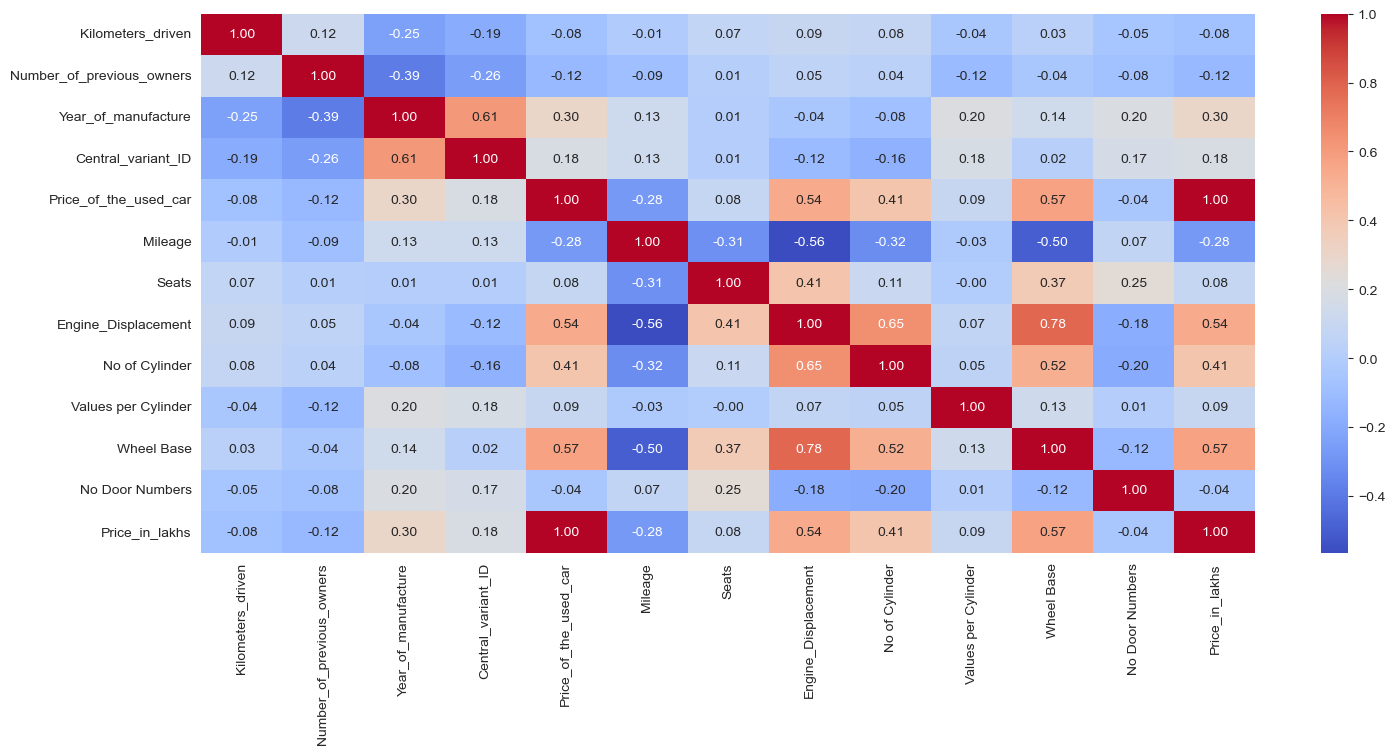

In [109]:
plt.figure(figsize=(17, 7))
sns.heatmap(corr_data, fmt=".2f", annot= True, cmap= "coolwarm")
plt.show()

In [111]:
car_dheko = data[['Car_brand', 'Year_of_manufacture', 'Kilometers_driven',
       'Number_of_previous_owners', 'Transmission_type', 'Fuel_type',
       'Body_type','Price_of_the_used_car','Engine_Displacement', 'Engine_Category', 'Mileage','Wheel Base', 'Seats', 'No of Cylinder', 'City', 'Price_in_lakhs']]

In [113]:
car_dheko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Car_brand                  8368 non-null   object  
 1   Year_of_manufacture        8368 non-null   int64   
 2   Kilometers_driven          8368 non-null   int64   
 3   Number_of_previous_owners  8368 non-null   int64   
 4   Transmission_type          8368 non-null   object  
 5   Fuel_type                  8368 non-null   object  
 6   Body_type                  8368 non-null   object  
 7   Price_of_the_used_car      8368 non-null   int64   
 8   Engine_Displacement        8368 non-null   int32   
 9   Engine_Category            8368 non-null   category
 10  Mileage                    8368 non-null   float64 
 11  Wheel Base                 8368 non-null   int32   
 12  Seats                      8368 non-null   int64   
 13  No of Cylinder             8368 n

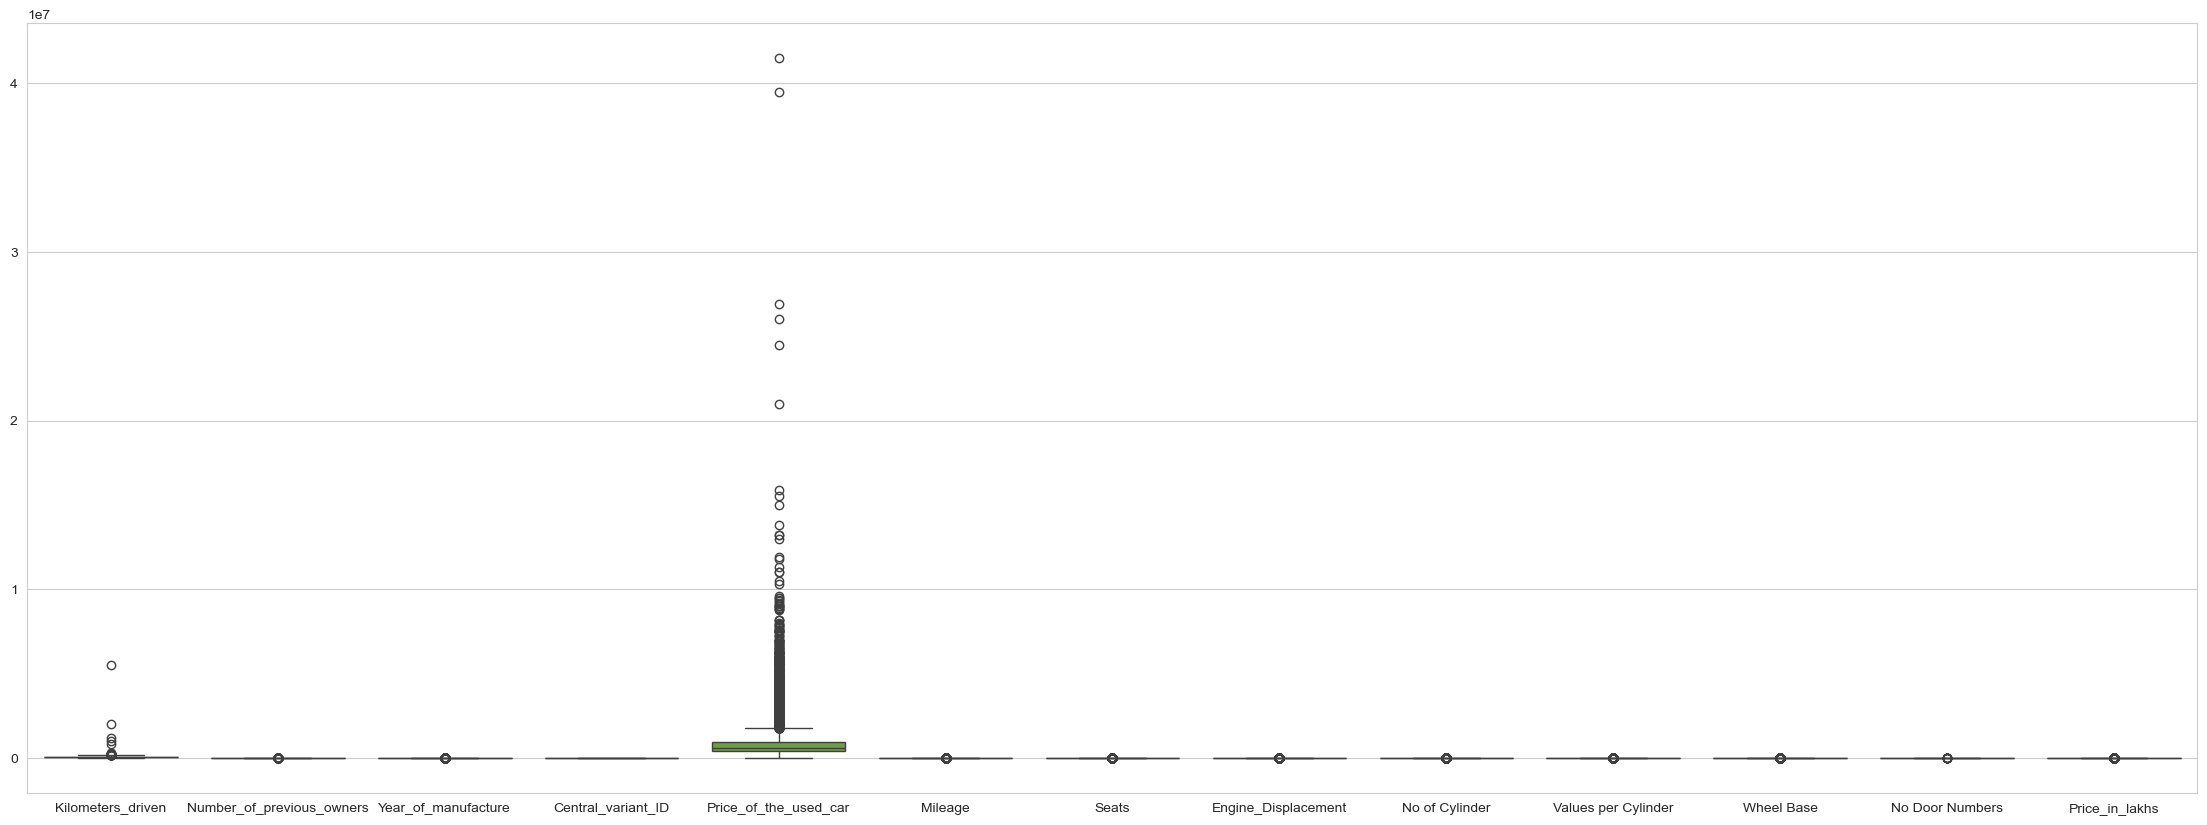

In [115]:
plt.figure(figsize= (28, 10))
sns.boxplot(data = data)
plt.show()

In [323]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [329]:
ss = StandardScaler()
ss.fit_transform(car_dheko1[['Kilometers_driven']])

array([[ 0.8239431 ],
       [-0.35475344],
       [-0.63502705],
       ...,
       [-0.12123936],
       [-0.25626543],
       [ 0.8239431 ]])

In [331]:
car_dheko1['SS_km'] = ss.fit_transform(car_dheko1[['Kilometers_driven']])

C:\Users\osrnm\AppData\Local\Temp\ipykernel_28036\1396453892.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



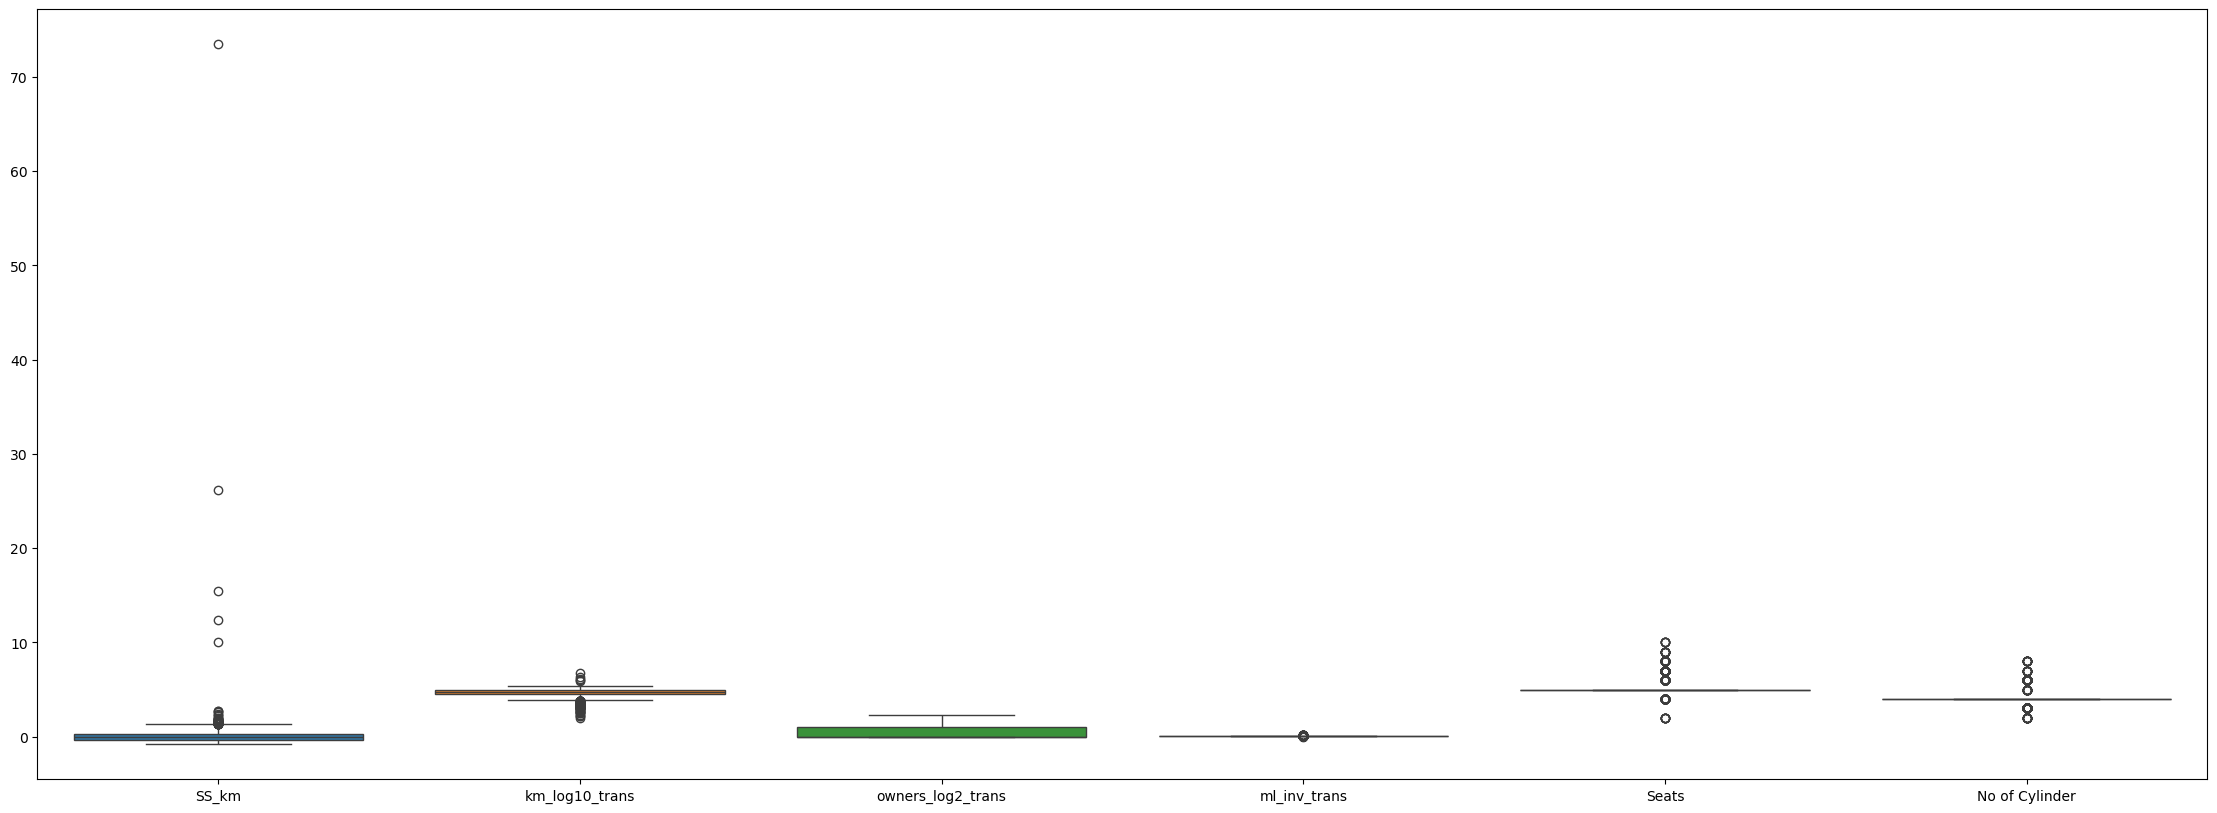

In [333]:
plt.figure(figsize= (28, 10))
sns.boxplot(data = car_dheko1[['SS_km', 'km_log10_trans', 'owners_log2_trans','ml_inv_trans', 'Seats','No of Cylinder']])
plt.show()